# Social Sensing 1

There are a lot of social, cultural and other datasets out there on the web. We have already learned how to extract data from web sites directly. 

Many data items can also be accessed via a so-called API (Application Programming Interface). You can think of an API as a window through which you have access to remotely stored data rather than web pages. Often access to these APIs is limited by some kind of registration key you have to use to open that window. We will start with a few open APIs before we try Twitter and its complicated access.

Run the cell below to load some of our typical libraries.

In [1]:
#Keep cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sca
from ipynb.fs.full.keys import *

In the first part, we will use data from https://www.data.gov/, which is 'the home of the U.S. Government’s open data'.

To call an API in Python and access data from a website we need the requests package first.  Please, import it with `import requests`.

In [2]:
import requests

You can think of the API calls we are doing as a direct way of accessing the data behind the web pages you see in your browser. As a taste go to a browser window, and paste the following URL: https://developer.nrel.gov/api/utility_rates/v3.json?api_key=DEMO_KEY&address=1600+Amphitheatre+Parkway%2C+Mountain+View%2C+CA

What do you see? You should see details about an address in the United States '1600 Amphitheatre Parkway, Mountain View, CA'. What you see is the JSON format, which is a way of transmitting data rather than websites. According to https://en.wikipedia.org/wiki/JSON, JSON describes'data objects consisting of attribute–value pairs'. For instance, you should see something like "address":"1600 Amphitheatre Parkway, Mountain View, CA", which defines the address. It looks a bit like a Python dictionary. 

Python provides easy access to JSON files. Run `import json`.

In [3]:
import json

To get to the JSON file, we need to open a session with request. Type in `S = requests.Session()`.

In [4]:
S = requests.Session()

Then, we define the URL we have to address with our call, which is everything before the ? in the URL you typed into the brower. So, type in `URL = 'https://developer.nrel.gov/api/utility_rates/v3.json'`.

In [5]:
URL = 'https://developer.nrel.gov/api/utility_rates/v3.json'

We want to play with electricity rates and associated coordinate information for US locations. Let’s first define a place we are interested in.  

For our requests call, we next need a number of parameters like the location we are interested in. We also need the API key, which is something we will come back to later again when we look at Twitter. It is basically a way of authenticating our requests. For playing with data.gov, we can use the DEMO_KEY.

Run:
```
PARAMS = {
    "address": "1600 Amphitheatre Parkway, Mountain View, CA",
    "api_key": 'DEMO_KEY'
}
```

In [6]:
PARAMS = {
    "address": "1600 Amphitheatre Parkway, Mountain View, CA",
    "api_key": 'DEMO_KEY'
}

Do you know who ‘lives’ at this address? It's Google's headquarters.

Next we run the actual request, which is called a get-request, because we want to retrieve data. We can also 'put' data with a put request, if we have the right access. For our next call `R = S.get(url=URL, params=PARAMS, verify=False)`, we need the URL and PARAMS as parameters. We also say verify=False, as we are just experimenting and don't need verification. Please, ignore any warning you might get.

In [7]:
R = S.get(url=URL, params=PARAMS, verify=False)

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'developer.nrel.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Request has a json() function that can easily translate the received JSON into a Python object. Run:
```
DATA = R.json()
DATA
```

In [8]:
DATA = R.json()
DATA

{'inputs': {'address': '1600 Amphitheatre Parkway, Mountain View, CA'},
 'errors': [],
 'warnings': [],
 'version': '3.1.0',
 'metadata': {'sources': ['Ventyx Research (2012)']},
 'outputs': {'company_id': '14328',
  'utility_name': 'Pacific Gas & Electric Co',
  'utility_info': [{'company_id': '14328',
    'utility_name': 'Pacific Gas & Electric Co'}],
  'commercial': 0.1408,
  'industrial': 0.0898,
  'residential': 0.1559}}

It seems we got no errors and that we learned quite a bit about the utilities at the locations we are interested. This is because the data actually comes from https://nrel.gov/. 

Unfortunately, the result is a rather complex structure still. It is a dictionary of dictionaries. But we know how to access the individual elements. Type `DATA['outputs']['utility_name']` to print out what? Do you remember how we use dictionaries?

In [9]:
DATA['outputs']['utility_name']

'Pacific Gas & Electric Co'

This way, we got the utitility name. Try now to get the residential electricity rate at the address. Look for outputs and then residential. Tip: you need to replace 'utility_name' with 'residential'.

In [10]:
DATA['outputs']['residential']

0.1559

There are many useful APIs out there. Check out https://www.programmableweb.com/. Unfortunately, many are not as easy to access as data.gov. 

Let's check next the geo-locations for our address.

We will now repeat the same steps as above but with the wikipedia API. API work is always just the repetition of the same or very similar steps. 

Type in `URL = 'https://en.wikipedia.org/w/api.php'` to go to the Wikipedia API service.

In [11]:
URL = 'https://en.wikipedia.org/w/api.php'

We are interested in the latitude and longitude of the Googleplex. 

To this end, we need to give the API the following paramenters. They define the type of action, the format, the title of Wikipedia page and what it should return, which are the coordinates.

Run:
```
PARAMS = {
    "action": "query",
    "format": "json",
    "titles": "Googleplex",
    "prop": "coordinates"
}
```

In [12]:
PARAMS = {
    "action": "query",
    "format": "json",
    "titles": "Googleplex",
    "prop": "coordinates"
}

The next cell is given to you, as it just exectures the requests and decodes the returned data. Run it.

In [13]:
#Keep cell

R = S.get(url=URL, params=PARAMS, verify=False)
DATA = R.json()
pages = DATA['query']['pages']
pages

/usr/local/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'en.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'773423': {'pageid': 773423,
  'ns': 0,
  'title': 'Googleplex',
  'coordinates': [{'lat': 37.422,
    'lon': -122.084,
    'primary': '',
    'globe': 'earth'}]}}

The longitude and latitude are hidden in there somewhere. Print out the latitude with `pages['773423']['coordinates'][0]['lat']`. The first number might differ but you can find it as the first element of our output.

In [14]:
pages['773423']['coordinates'][0]['lat']

37.422

You could now use https://www.latlong.net/Show-Latitude-Longitude.html to map these longitude and latitude and would find the Googleplex.

We have just worked through simple API requests that got us locations. More interesting will be to access social media applications like Twitter and Facebook. We can also get their data through APIs. Twitter is especially popular. 

In Python, there is a library that makes accessing Twitter data simple. Tweepy (https://docs.tweepy.org/en/stable/) hides from us all the complicated questions of authentication and parsing JSON responses. Load it with `import tweepy`.

In [15]:
import tweepy

Because we are dealing for Twitter with more personal information and there is a large company behind the data, going through the authentication with Twitter is not easy. Here is the technical documentation: https://docs.tweepy.org/en/stable/auth_tutorial.html. There are many useful online instructions like https://towardsdatascience.com/how-to-access-twitters-api-using-tweepy-5a13a206683b. If you are linked to a university, there is also a special research access mode: https://consent.yahoo.com/v2/collectConsent?sessionId=3_cc-session_79541b62-34e2-4451-8830-2f49ef2ef090. 


But you might quickly want to forget about the technical details and are probably happy as long as you can connect? Once you have read through some tutorials, just run the cell below to get started with today's Twitter work.

In [16]:
#Keep cell

consumer_key = twit_key
consumer_secret = twit_secr
access_token = twit_token

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
api

Most of the details of the authentication are linked to the keys, tokens, etc. you received when registering your account. Hopefully, you are connected afterwards to the API and it shows something like <tweepy.api.API at 0x7f8b990465f8>. 

One important detail I would like to quickly discuss is the rate limit of Twitter. Twitter limits the amount of API calls you can do at any moment in time, which is often an issue if you retrieve a lot of followers from big accounts. Rate limits are one of the biggest issues in Twitter analysis once the data gets a bit bigger. Check out the details at https://dev.twitter.com/rest/public/rate-limiting. You will find plenty of people online who complain, as you quickly reach your rate limit. So, be careful with the access to the API. wait_on_rate_limit=True in tweepy.API tells all your api calls to automatically wait for your rate limit to refresh.

But you might not have Twitter API access yet? Then, continue with some historical data and run the next cell. You need to first click on it and make it into a 'code' cell from the drop-down menu above. Then, continue with cells 23-45 and cell 45 for the further analysis.

#Keep cell

follower_df =  pd.read_csv('data/followers-tb.csv')
with open("data/all_sn_list.json", 'r') as f:
    all_sn_list = json.load(f)

If you are already connected to Twitter on the other hand, you can run your own queries. Let’s get Barack Obama's timeline and his first tweet first. This is easy with `tweets = api.user_timeline(screen_name = 'BarackObama', count=100)`. As you can see Tweepy hides all the complexities of API calls into functions like user_timeline(). You preceed all these functions with Tweepy's 'api.'. In this case, you ask for the screen_name of Barack Obama and you want to retrieve 100 tweets. 

In [17]:
tweets = api.user_timeline(screen_name = 'BarackObama', count=100)

Did I say that Tweepy hides all the complicated JSON details. Well, this is not entirely true, as of course it does not know what you would like to retrieve. 

Let's check the first tweet of the dataset by typing `tweets[0]`. As you can see tweets is a list. We will be working with a lot of lists today.

In [18]:
tweets[0]

Status(_api=<tweepy.api.API object at 0x12a2f2c40>, _json={'created_at': 'Thu Dec 02 22:00:08 +0000 2021', 'id': 1466527628878389257, 'id_str': '1466527628878389257', 'text': 'Shots are never fun, but the kids I met at Kimball Elementary knew how important the COVID-19 vaccines are to keep… https://t.co/KnOvIPeBB3', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/KnOvIPeBB3', 'expanded_url': 'https://twitter.com/i/web/status/1466527628878389257', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}, 'source': '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 813286, 'id_str': '813286', 'name': 'Barack Obama', 'screen_name': 'BarackObama', 'location': 'Washington, DC', 'description': 'Dad, husband, Pr

As we can see each tweet has an id and a lot of other metadata attached to it such as retweets, locations, etc. Did you know that you produce so much information with each tweet?

Tweepy maskes it easy to access the details. To get the text of tweet, e.g., type in `tweets[0].text`.

In [19]:
tweets[0].text

'Shots are never fun, but the kids I met at Kimball Elementary knew how important the COVID-19 vaccines are to keep… https://t.co/KnOvIPeBB3'

With the dot notation tweets[0].text, you can access all the attributes. For instance, each tweet has an id. Run `tweets[0].id`.

In [20]:
tweets[0].id

1466527628878389257

Let's do some quick timeline analysis next. Can you access the attribute 'created_at'?

In [21]:
tweets[0].created_at

datetime.datetime(2021, 12, 2, 22, 0, 8)

This returns a datetime object, which as the year, month, day, minutes and seconds. Dates are complicated to represent in any programming language, but Python has some powerful tools at hand. We will come back to this several times. Here, we move on.

With the timeline, we can plot Obama's Twitter activity? We have provided a helper function. Type in  `sca.plot_twitter_activity(tweets)`.

<Figure size 432x288 with 0 Axes>

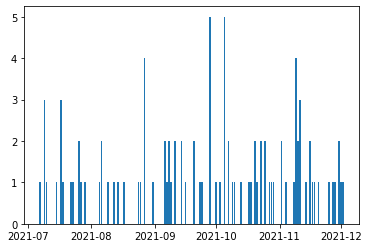

In [22]:
sca.plot_twitter_activity(tweets)

Nice. Timelines are a very popular analysis with only one piece of the rich metadata of Twitter. They show patterns of Twitter activities for individuals. Or you could test whether a certain topic/hashtag generates more excitement at specific times, etc. 

Let’s move on from Obama. In order to access my own Twitter favourites, please type in `api.favorites('tobias_blanke')`.

In [23]:
favorites = api.favorites('tobias_blanke')

Let's check the text of the first tweet I marked as favourite. Do you know how?

In [24]:
favorites[0].text

'📢📢📢Happy to share the news that I am now Assistant Professor of Critical Data Studies at @UvA_Amsterdam Dpt of Medi… https://t.co/8pNGkx8Fgo'

So far, so good. Of course, these requests were quite simple. So, let’s try something more complicated. We start with  a look at retweet structures and then a typical content analysis in Twitter. Tweets are little pieces of texts with lots of metadata attached to them (https://en.wikipedia.org/wiki/Twitter). So, it is not surprising that many people try and run text analysis on the content of tweets. Let’s start with that.

The first step is to search Twitter for something of interest by running `tweets = api.search(q=‘#uva’, count = 10)`. This search will look for the most recent tweets (count=10) with the hashtag uva.

In [25]:
tweets = api.search(q='#uva', count = 10)

Again, we get a list of tweets back. But now we want to do something more complicated with the results than just access one tweet. In Python, we have loops for that - as you might remember. Let's take a look at a foor-loop example that simply prints out a number of integers. You might remember range(), which will give us a list of integers? 

Run:
```
for x in range(10):
    x = x * 2
    print(x)
```

In [26]:
for x in range(10):
    x = x * 2
    print(x)

0
2
4
6
8
10
12
14
16
18


Of course, you noticed that we also multiplied x by 2 before we printed it. In a for-loop you can do any kind of complex calculations. However, for-loops also often become complicated quickly.

Python provides list comprehensions to make the processing of lists much easier. Check out: https://docs.python.org/3/tutorial/datastructures.html. A very good tutorial can be found at https://www.programiz.com/python-programming/list-comprehension.

The general structure of a list comprehensionis [expression for item in list]. To replace a for-loop to create a list of 10 numbers with a list comprehension, simply run this one line: `[x for x in range(10)]`.

In [27]:
[x for x in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

You can also apply a function to x by adding it at the beginning. Run `[x*2 for x in range(10)]`  to multiply x by 2.

In [28]:
[x*2 for x in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Finally, you can filter the numbers by adding an if-statement. `[x*2 for x in range(10) if x % 2 == 0]` will keep only even numbers. % is the modulo operator. Try it.

In [29]:
[x*2 for x in range(10) if x % 2 == 0]

[0, 4, 8, 12, 16]

You will get used to list comprehensions with practice ...

Let's use our new knowledge to print out all the texts in tweets. Run `[tweet.text for tweet in tweets]`.

In [30]:
[tweet.text for tweet in tweets]

["RT @ByDavidTeel: A column on #UVA's Bronco Mendenhall exiting the only way he could.\n\nhttps://t.co/3haC7cBn8t",
 'Episode 200(!) - In-depth preview of #WASvsLV:\n- Scott Turner &amp; Jack Del Rio speak\n- how will #WashingtonFootball d… https://t.co/xYWRhBpAEN',
 'RT @GregMadia: "It’s my decision only." \n\nIn a wild cycle of coaching changes across college football, #UVa\'s Bronco Mendenhall is making t…',
 'RT @hipotecadosuva: El gobierno se encarga de relatar constantemente el fracaso de los #UVA, remarcando la pésima gestión de Cambiemos, per…',
 '@ZihniOzdil Ook Machiel Keestra is gemaakt van 100% Nederlands deugdildo\n#UVA #deugdildo #Diversity',
 'RT @aaronmcfarling: #UVa\nhttps://t.co/tz9Ai60PIT',
 '#UVa\nhttps://t.co/tz9Ai60PIT',
 "RT @RTD_MikeBarber: Who needs a search firm? #UVA can hire Anthony Poindexter to be its head coach. He'll hire a defensive staff and the 'H…",
 'RT @GrupoTHM: La #termoterapia, un gran aliado en la #sanidad de la #vid 🌡️💦🍇\n\nEvento realizado po

Before our excursion into list comprehensions, we promised to look into retweets , which are either directly indicated in the tweet metadata tweet.retweeted=True or are done the old fashioned way with RT @ in the text. So, let's use our new knowledge about how to filter list comprehensions and add an if-statement to set retweeted_tweets. 

We need to combine the two conditions with an or statement. Type in `retweeted_tweets = [tweet for tweet in tweets if ((tweet.retweeted) or ('RT @' in tweet.text))]`.

In [31]:
retweeted_tweets = [tweet for tweet in tweets if ((tweet.retweeted) or ('RT @' in tweet.text))]

Next print out all the texts of retweeted_tweets with a list comprehension. You can do it!

In [32]:
[tweet.text for tweet in retweeted_tweets]

["RT @ByDavidTeel: A column on #UVA's Bronco Mendenhall exiting the only way he could.\n\nhttps://t.co/3haC7cBn8t",
 'RT @GregMadia: "It’s my decision only." \n\nIn a wild cycle of coaching changes across college football, #UVa\'s Bronco Mendenhall is making t…',
 'RT @hipotecadosuva: El gobierno se encarga de relatar constantemente el fracaso de los #UVA, remarcando la pésima gestión de Cambiemos, per…',
 'RT @aaronmcfarling: #UVa\nhttps://t.co/tz9Ai60PIT',
 "RT @RTD_MikeBarber: Who needs a search firm? #UVA can hire Anthony Poindexter to be its head coach. He'll hire a defensive staff and the 'H…",
 'RT @GrupoTHM: La #termoterapia, un gran aliado en la #sanidad de la #vid 🌡️💦🍇\n\nEvento realizado por la empresa https://t.co/u0ITD0SHkk 🔝en…',
 'RT @hipotecadosuva: El gobierno se encarga de relatar constantemente el fracaso de los #UVA, remarcando la pésima gestión de Cambiemos, per…']

Retweets can be used as a proxy for tweet importance. However, be careful, as people retweet for all kinds of reasons.

As promised, we would also like to run a simple content analysis with the text in the tweets. We will produce a simple word cloud. Let's first extract the text from the tweets with `tweet_text = [tweet.text for tweet in tweets]`. You should be used to it by now?

In [33]:
tweet_text = [tweet.text for tweet in tweets]

We have created a very pretty make_wordcloud function to create a word cloud from the texts of tweets. Run `sca.make_wordcloud_tweets(tweet_text)`. Later you will learn how to create word clouds yourself but for now this is enough.

<AxesSubplot:>

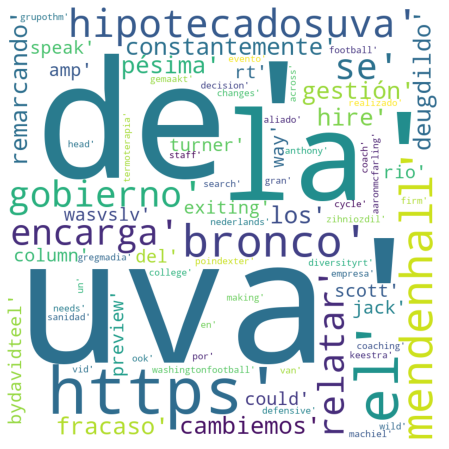

In [34]:
sca.make_wordcloud_tweets(tweet_text)

Hmmm, https shows up there pretty big, let's check if everything was ok. Print tweet_text.

In [35]:
tweet_text

["RT @ByDavidTeel: A column on #UVA's Bronco Mendenhall exiting the only way he could.\n\nhttps://t.co/3haC7cBn8t",
 'Episode 200(!) - In-depth preview of #WASvsLV:\n- Scott Turner &amp; Jack Del Rio speak\n- how will #WashingtonFootball d… https://t.co/xYWRhBpAEN',
 'RT @GregMadia: "It’s my decision only." \n\nIn a wild cycle of coaching changes across college football, #UVa\'s Bronco Mendenhall is making t…',
 'RT @hipotecadosuva: El gobierno se encarga de relatar constantemente el fracaso de los #UVA, remarcando la pésima gestión de Cambiemos, per…',
 '@ZihniOzdil Ook Machiel Keestra is gemaakt van 100% Nederlands deugdildo\n#UVA #deugdildo #Diversity',
 'RT @aaronmcfarling: #UVa\nhttps://t.co/tz9Ai60PIT',
 '#UVa\nhttps://t.co/tz9Ai60PIT',
 "RT @RTD_MikeBarber: Who needs a search firm? #UVA can hire Anthony Poindexter to be its head coach. He'll hire a defensive staff and the 'H…",
 'RT @GrupoTHM: La #termoterapia, un gran aliado en la #sanidad de la #vid 🌡️💦🍇\n\nEvento realizado po

As we can see there is a link to the tweet in each text, we should have removed that first. We can use regular expressions for this. They are complicated but powerful and implemented in the Python library re. Load it with `import re`.

In [36]:
import re

https://www.w3schools.com/python/python_regex.asp is a simple but effective tutorial of regular expressions in Python. 

Regular expressions require some practice, and it is best to learn from examples. Try `re.sub(r'http\S+', '', tweet_text[0])` to remove all https from the first tweet. re.sub (for substitute) takes two arguments. The first one is the regular expression pattern to match and the second one is the substitutions. We want to remove the https, so we substitute with an empty string ''. You need to read the regular expression pattern as 'find http and then any non-whitespace characters (\S+) until you reach a whitespace', This will remove the whole URL as in http://wwe.example.com.

In [37]:
re.sub(r'http\S+', '', tweet_text[0])

"RT @ByDavidTeel: A column on #UVA's Bronco Mendenhall exiting the only way he could.\n\n"

Next we want to use our re.sub(r'http\S+', '', ...) to remove all https in all tweets. Of course, we can do it with a list comprehension, because we can use a function directly on the expression. Assign `cleaned_tweet_text = [re.sub(r'http\S+', '', tweet) for tweet in tweet_text]`.

In [38]:
cleaned_tweet_text = [re.sub(r'http\S+', '', tweet) for tweet in tweet_text]    

Can you run our wordcloud function again to print out cleaned_tweet_text? 

<AxesSubplot:>

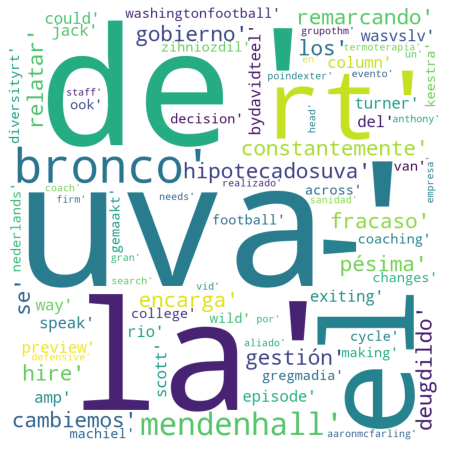

In [39]:
sca.make_wordcloud_tweets(cleaned_tweet_text)

Very popular with Twitter is also the analysis of followers. I don’t have very many. In fact, I am not really using Twitter much. But let’s still try. You can get my Twitter information by entering `me = api.get_user(screen_name = 'tobias_blanke')`.

In [40]:
me = api.get_user(screen_name = 'tobias_blanke')

Print out my description with `me.description`.

In [41]:
me.description

'past philosopher and computer scientist; now digital arts and humanities; research infrastructure; analytics and synthetics'

It’s me! 

My followers are a little bit more interesting. We can retrieve them by using api.followers('tobias_blanke'). Run `[follower.screen_name for follower in api.followers('tobias_blanke')]` to retrieve the screen names of 20 of my followers.

In [42]:
[follower.screen_name for follower in api.followers('tobias_blanke')]

['PastaWolf1',
 'TilburgU_DCA',
 'HelenaRae',
 'AlexWermerColan',
 'DilanCkr',
 'shivshaktighosh',
 'inge_stegeman',
 'ullahdhude',
 'anwagnerdreas',
 'ChapBookPro',
 'MingshuWang',
 'Zehui_Y',
 'KMalik0990',
 'dennmis',
 'mar__isi',
 'SBrkhrdt',
 'Sxander',
 'AnastasiaSiap',
 'damian0604',
 'armanes']

There are only 20 because we need to paginate through all pages of the lists of my followers to get them all - like in an address book where we move from one page to the next. We do this with tweepy.Cursor(): https://docs.tweepy.org/en/stable/pagination.html. While this might sound complicated, it actually makes our life much easier. Check out this a bit outdated tutorial, that makes this point very well: https://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html

We tell Cursor() to retrieve followers from the api of my screen name. Using the items() function, we retrieve the items on each page. Run `[follower for follower in tweepy.Cursor(api.followers, screen_name="tobias_blanke").items(1)]`. We only want to take a look at the first item (1).

http://sparida.blogspot.com/2019/12/twitter-data-collection-tutorial-using.html is a great tutorial how to set up a larger data collection from Twitter using the Google cloud services. This is probably for later though ...

In [43]:
[follower for follower in tweepy.Cursor(api.followers, screen_name="tobias_blanke").items(1)]

[User(_api=<tweepy.api.API object at 0x12a2f2c40>, _json={'id': 1424001961188278280, 'id_str': '1424001961188278280', 'name': 'Pastawolf', 'screen_name': 'PastaWolf1', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 3, 'friends_count': 225, 'listed_count': 0, 'created_at': 'Sat Aug 07 13:42:31 +0000 2021', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1424009767878549509/zI8Vmkvv_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1424009767878549509/zI8Vmkvv_normal.jpg', 'profile_link_color': '

A key measure of my own importance on Twitter is the importance of the people who follow me. Does this make sense? Of course it does, as with important followers you can influence a lot of people. Let’s get an overview of the friends and followers of those who follow me. To do so we first want to create a data frame that contains all my followers and their follower and friend count.

To analyse all the followers of an account, we simply need to collect the relevant metadata from each follower. First, however, we limit ourselves to 20 followers for demonstration purposes and to save on our rate limits. Run the next cell.

In [44]:
#Keep cell
n = 20

Next, we run: 
```
follower_list = [(follower.id, follower.screen_name, follower.followers_count, follower.friends_count) 
     for follower in tweepy.Cursor(api.followers, screen_name='tobias_blanke').items(n)]
```
This will access 20 followers (n=20). For each follower, we are interested in their id, screen name, the count of their followers and their friends (those who they follow). We can collect all this metadata by creating a tuple operator: (). Tuples are very easy to transform into data frames, which we want to do later. They are explained here: https://www.w3schools.com/python/python_tuples.asp.

In [45]:
follower_list = [(follower.id, follower.screen_name, follower.followers_count, follower.friends_count) 
     for follower in tweepy.Cursor(api.followers, screen_name='tobias_blanke').items(n)]

Let's print out the first two items with `follower_list[:2]`.

In [46]:
follower_list[:2]

[(1424001961188278280, 'PastaWolf1', 3, 225),
 (797564060392914944, 'TilburgU_DCA', 37, 422)]

A list of tuples can be loaded directly into a data frame. We create and print out a new data frame called follower_df with the column names 'ID', 'Screen_name', 'Followers_count' and 'Friends_count': 
```
follower_df = pd.DataFrame(follower_list, columns=['ID', 'Screen_name', 'Followers_count', 'Friends_count'])
follower_df
```

In [47]:
follower_df = pd.DataFrame(follower_list, columns=['ID', 'Screen_name', 'Followers_count', 'Friends_count'])
follower_df

,ID,Screen_name,Followers_count,Friends_count
0,1424001961188278280,PastaWolf1,3,225
1,797564060392914944,TilburgU_DCA,37,422
2,868301766785413120,HelenaRae,9,82
3,254865613,AlexWermerColan,2177,2384
4,824723708602437632,DilanCkr,83,580
5,1324242489511800833,shivshaktighosh,2,80
6,3284766308,inge_stegeman,93,377
7,94292452,ullahdhude,73,423
8,4162410142,anwagnerdreas,999,1755
9,788827729,ChapBookPro,1549,1825


20 of my followers with some of their metadata!

At this point we want to add two columns at the beginning of followers_df. We can add a column to a data frame at a particular location with insert(). Run `follower_df.insert(0, 'Me_sn', me.screen_name)` to add my screen name at the beginning of the data frame (position 0).

In [48]:
follower_df.insert(0, 'Me_sn', me.screen_name)

Also insert Me_ID at the beginning of the data frame by running insert() again. Tip: You just need to replave Me-sn with Me_ID.

In [49]:
follower_df.insert(0, 'Me_ID', me.id)

Print out the first few rows of follower_df.

In [50]:
follower_df.head()

,Me_ID,Me_sn,ID,Screen_name,Followers_count,Friends_count
0,57082583,tobias_blanke,1424001961188278280,PastaWolf1,3,225
1,57082583,tobias_blanke,797564060392914944,TilburgU_DCA,37,422
2,57082583,tobias_blanke,868301766785413120,HelenaRae,9,82
3,57082583,tobias_blanke,254865613,AlexWermerColan,2177,2384
4,57082583,tobias_blanke,824723708602437632,DilanCkr,83,580


We can scatter plot the chosen followers to see how many friends and followers they have. Do you remember how? It's easy in Pandas with `follower_df.plot.scatter(x='Friends_count', y='Followers_count')`. x and y name the respective axes.

<AxesSubplot:xlabel='Friends_count', ylabel='Followers_count'>

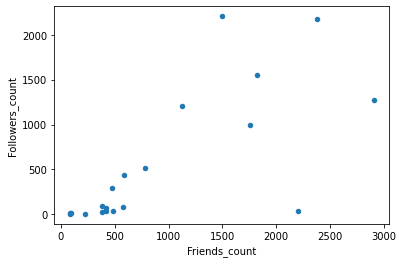

In [51]:
follower_df.plot.scatter(x='Friends_count', y='Followers_count')

Most of my followers do not have too many followers themselves. My influence is really limited. But this might also be because we only chose 20 for this session. 

Let's run some basic statistics on the data to show you what else you could do. Type in `follower_df.loc[:,['Followers_count', 'Friends_count']].median()` to access the median value of both counts for followers and friends 

In [52]:
follower_df.loc[:,['Followers_count', 'Friends_count']].median()

Followers_count     88.0
Friends_count      529.5
dtype: float64

Generally, my followers follow many more people than they are followed. For big Twitter influencers the opposite is often the case. They follow fewer people but are followed by millions.

We can use Pandas describe() to get a quick statistical summary with `follower_df.loc[:,['Followers_count', 'Friends_count']].describe()`.

In [53]:
follower_df.loc[:,['Followers_count', 'Friends_count']].describe()

,Followers_count,Friends_count
count,20.000000,20.000000
mean,553.800000,933.450000
std,743.837178,856.069013
min,2.000000,80.000000
25%,33.750000,380.750000
50%,88.000000,529.500000
75%,1050.000000,1563.000000
max,2207.000000,2909.000000


Take a close look at the table and try and formulate a few insights. For instance, at the time of writing, the maximum followers were 2182 and the minimum 2. 25% of those who follow me had less than 29 followers but about 340 friends. 

What does it mean, for instance, that the mean and median are very different, where median is of course the 50% quantile? The Khan Academy is a good source for such statistical knowledge: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/mean-median-basics/a/mean-median-and-mode-review.

Interesting could also be whether the counts of friends and followers are correlated. To calculate the Pearson correlation (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), we can run `follower_df.corr(follower_df.loc[:,['Followers_count', 'Friends_count']])`

In [54]:
follower_df.loc[:,['Followers_count', 'Friends_count']].corr()

,Followers_count,Friends_count
Followers_count,1.000000,0.729997
Friends_count,0.729997,1.000000


You should get back a table that shows all four possible correlations between the variables. 

The table hopefully also shows that Followers_count and Friends_count are correlated. I got a value of around 0.7. The value is positive, which means that the counts are positively correlated: the more followers the more friends and vice versa. For bigger influencers, this is not necessarily the case, but for standard Twitter users that connect to their communities, this might make sense. Definitely something to check with a larger population of Twitter users?

Finally, we would like to plot both counts. Histograms will be useful here. Run `follower_df['Followers_count'].plot.hist()`.

<AxesSubplot:ylabel='Frequency'>

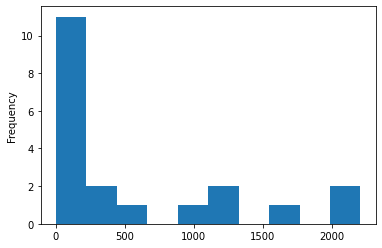

In [55]:
follower_df['Followers_count'].plot.hist()

While this plot could be much nicer, we can easily see the pattern that most of my followers do not have a lot of followers themselves. There are a couple of outliers, too.

Can you plot a histogram for Friends_count?

<AxesSubplot:ylabel='Frequency'>

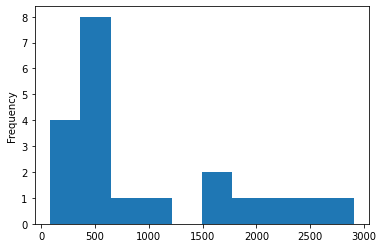

In [56]:
follower_df['Friends_count'].plot.hist()

The plot should look similar to the followers? 

Social network analysis is really important both in social and cultural analytics. It uses graphs to explain and analyse social relations. We have already started talking about social networks. In an earlier session, we talked about teens and their networks. Here, we looked into my followers and those friends that I am following. Then, we investigated the friends of these friends and the followers of these followers. To build these kinds of relationships and map them onto graphs to visualise and analyse them is really what social networks are all about. 

We would like to next build a network graph to represent social networks. This is a bit more complicated. So, let's do this step by step. 

We want to add the screen names of my followers to the graph. So, let's create a list of them with `screen_name_list = list(follower_df['Screen_name'])`.

In [57]:
screen_name_list = list(follower_df['Screen_name'])

We already have my followers of course. Let's put them into a list, which we want to later expand with the followers of my followers. Run `all_sn_list = list(zip(follower_df['Me_sn'], follower_df['Screen_name']))` to create a list of tuples where my screen name is the first entry and the screen name of my followers is the second. zip() is a function to create a tuple form two variables: https://www.w3schools.com/python/ref_func_zip.asp.

In [58]:
all_sn_list = list(zip(follower_df['Me_sn'], follower_df['Screen_name']))

Print out `all_sn_list[:5]` for the first five entries.

In [59]:
all_sn_list[:5]

[('tobias_blanke', 'PastaWolf1'),
 ('tobias_blanke', 'TilburgU_DCA'),
 ('tobias_blanke', 'HelenaRae'),
 ('tobias_blanke', 'AlexWermerColan'),
 ('tobias_blanke', 'DilanCkr')]

This worked. Now, let's get the followers of my followers by iterating over their screen names and running tweepy.Cursor(api.followers, screen_name = ...) on them. We want to limit ourselves to 5 followers each to save on the rates. So let's set `n_followers = 5` first.

In [60]:
n_followers = 5

For each `sn in screen_name_list` we want to retieve `s_ = [(sn, follower_.screen_name) for follower_ in tweepy.Cursor(api.followers, screen_name=sn).items(n_followers)]` and then add the result to the my existing followers. As the result is a list we need to use extend() which adds lists to lists, while you already met append(), which adds a single element. So, we add `all_sn_list.extend(s_)`. Try extend() at https://www.w3schools.com/python/ref_list_extend.asp. 

We could now run this in a simple for-loop and would quickly meet a problem that for some followers we cannot retrieve their list of followers. They might not provide access, for instance. So, all our efforts would be interrupted at that point, which is pretty annoying as we are dealing with expensive Twitter API calls. This is why, we will add another standard feature of Python and catch any exception Twitter returns called tweepy.TweepError.

This is done with the try and except construct: https://www.w3schools.com/python/python_try_except.asp. The try block tests a block of code for errors. The except block handels them. Whenever you run a larger project for scraping or API access, this construct is highly recommended to not lose all yur work 2/3 through the access call.

The code below tells Python to catch any tweepy.TweepError() and skip it by continuing with the next iteration of the loop (with continue). Before that, it prints out the screen name to be skipped and sleeps for 60 seconds to give the Twitter API time to recover. It uses time.sleep() for that.

In [61]:
#Keep cell

import time
for sn in screen_name_list:
    try:
        s_ = [(sn, follower_.screen_name) for follower_ in 
              tweepy.Cursor(api.followers, screen_name=sn).items(n_followers)]
        all_sn_list.extend(s_)
    except tweepy.TweepError:
        print('Skipping {}.'.format(sn))
        time.sleep(60)
        continue

Skipping shivshaktighosh.


That should have taken a little while. But you got it all now. Check the result with `all_sn_list[-1]`. -1 prints out the last element of a list.

In [62]:
all_sn_list[-1]

('dariorodighiero', 'anakomissarof')

On to the visualisation! Run our very own `sca.create_twitter_network(all_sn_list)` to create a Twiter network graph of my followers. In the next lesson, we will learn how to make these networks ourselves.

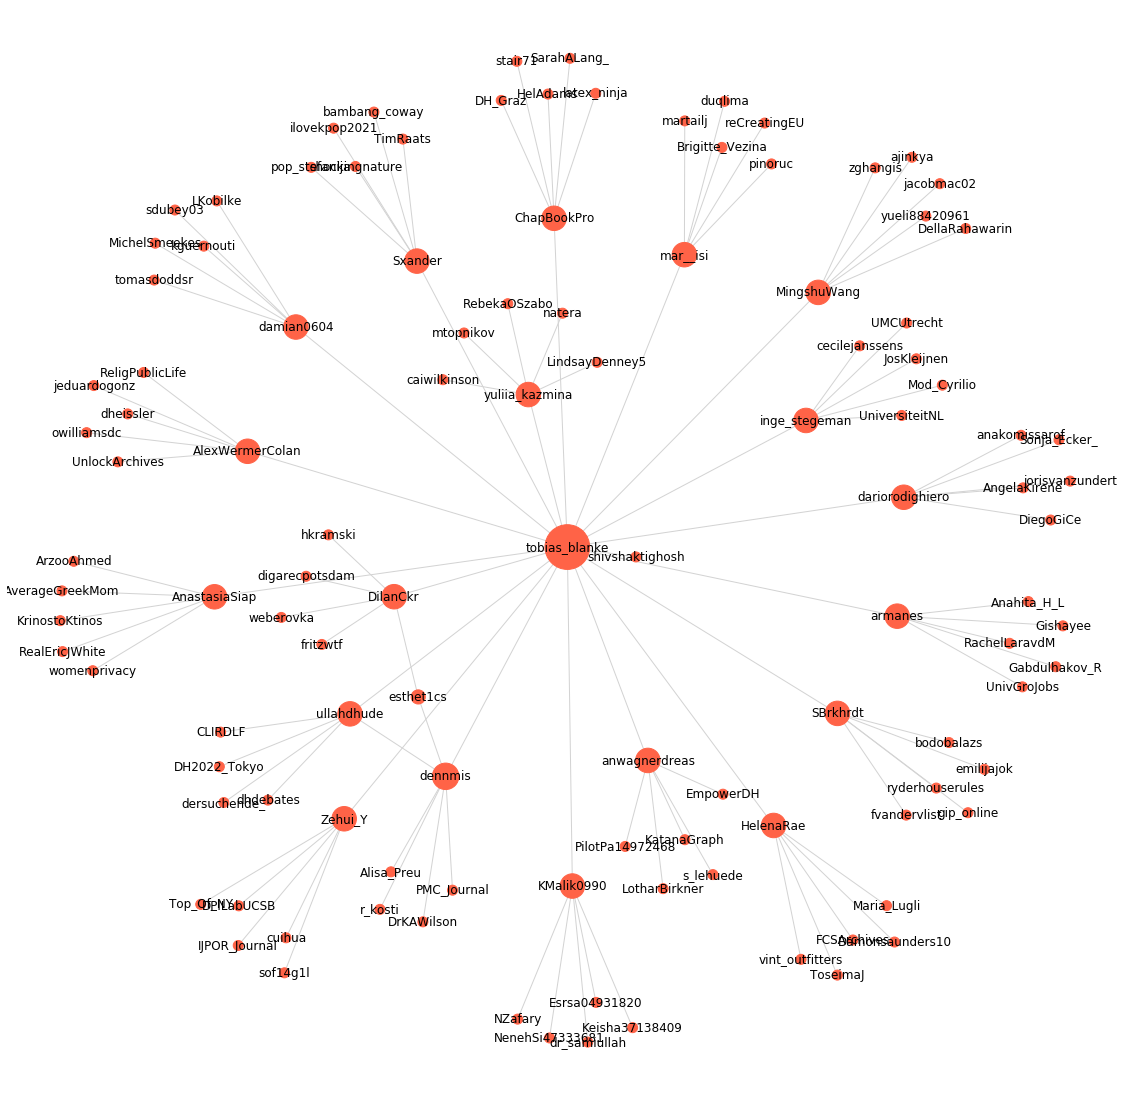

In [63]:
sca.create_twitter_network(all_sn_list)

To be honest, this network does not look very exciting. It points straight from me to my followers and their followers. It would be more interesting to also add the other direction with the friend relations and overlay their network. Together friends and followers should offer more interesting patterns/ connections. All you have to do is to collect the friends from my followers, too. You can easily reuse the existing code and just have to replace the API calls. We leave this for you to do yourself ...

The next session will introduce many more exciting ways to create, visualise and analyse social networks.